# Project 1: Regression on real estate market - Kings County

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
import datetime

## Read the file and check the data

In [88]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv", na_values="?")
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           NaN    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [89]:
# drop "id" column
df.drop("id", inplace=True, axis=1)
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         NaN   0.0          3      7        1180            0.0      1955   
1         0.0   0.0          3      7        2170          400.0      1951   
2         0.0   0.0          3      6         770            0.0      1933   
3         0.0   0.0          5      7        1050          910.0      1965   
4         0.0   0.0          3      8        1680            0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

In [90]:
print("hopefully no negatives")
print(df.min())
print("----")
print("here max values")
print(df.max())

hopefully no negatives
date             1/10/2015
price                78000
bedrooms                 1
bathrooms              0.5
sqft_living            370
sqft_lot               520
floors                   1
waterfront               0
view                     0
condition                1
grade                    3
sqft_above             370
sqft_basement            0
yr_built              1900
yr_renovated             0
zipcode              98001
lat                47.1559
long              -122.519
sqft_living15          399
sqft_lot15             651
dtype: object
----
here max values
date             9/9/2014
price             7.7e+06
bedrooms               33
bathrooms               8
sqft_living         13540
sqft_lot          1651359
floors                3.5
waterfront              1
view                    4
condition               5
grade                  13
sqft_above           9410
sqft_basement        4820
yr_built             2015
yr_renovated         2015
zipcode     

In [91]:
df[df["bedrooms"] >= 10]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8748    8/21/2014   520000.0        11       3.00         3000      4960   
13301   8/14/2014  1150000.0        10       5.25         4590     10920   
15147  10/29/2014   650000.0        10       2.00         3610     11914   
15856   6/25/2014   640000.0        33       1.75         1620      6000   
19239  12/29/2014   660000.0        10       3.00         2920      3745   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
8748      2.0         0.0   0.0          3      7        2400          600.0   
13301     1.0         0.0   2.0          3      9        2500         2090.0   
15147     2.0         0.0   0.0          4      7        3010          600.0   
15856     1.0         0.0   0.0          5      7        1040          580.0   
19239     2.0         0.0   0.0          4      7        1860         1060.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
8748       1918        1999.0    98106  47.5560 -122.363           1420   
13301      2008           0.0    98004  47.5861 -122.113           2730   
15147      1958           0.0    98006  47.5705 -122.175           2040   
15856      1947           0.0    98103  47.6878 -122.331           1330   
19239      1913           0.0    98105  47.6635 -122.320           1810   

       sqft_lot15  
8748         4960  
13301       10400  
15147       11914  
15856        4700  
19239        3745

In [92]:
# find and remove outliers outliners are "bedrooms" > 10
df.bedrooms = df.bedrooms.apply(lambda x: None if x > 10 else x)
df[df["bedrooms"] == 10]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
13301   8/14/2014  1150000.0      10.0       5.25         4590     10920   
15147  10/29/2014   650000.0      10.0       2.00         3610     11914   
19239  12/29/2014   660000.0      10.0       3.00         2920      3745   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
13301     1.0         0.0   2.0          3      9        2500         2090.0   
15147     2.0         0.0   0.0          4      7        3010          600.0   
19239     2.0         0.0   0.0          4      7        1860         1060.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
13301      2008           0.0    98004  47.5861 -122.113           2730   
15147      1958           0.0    98006  47.5705 -122.175           2040   
19239      1913           0.0    98105  47.6635 -122.320           1810   

       sqft_lot15  
13301       10400  
15147       11914  
19239        3745

In [93]:
print(df.max())

date             9/9/2014
price             7.7e+06
bedrooms               10
bathrooms               8
sqft_living         13540
sqft_lot          1651359
floors                3.5
waterfront              1
view                    4
condition               5
grade                  13
sqft_above           9410
sqft_basement        4820
yr_built             2015
yr_renovated         2015
zipcode             98199
lat               47.7776
long             -121.315
sqft_living15        6210
sqft_lot15         871200
dtype: object


In [94]:
print(f"Length: {len(df)}")
print(f"Shape: {df.shape}")

Length: 21597
Shape: (21597, 20)


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21595 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(10), int64(9), object(1)
memory usage: 3.3+ MB


In [96]:
# dateobject to int = YYYYMMDD
df["date"] = pd.to_datetime(df["date"]).dt.strftime("%Y%m%d")
df[400:405]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
400  20150306  557000.0       3.0       3.50         1710      2096     2.0   
401  20140825  360000.0       4.0       1.75         3730     16980     1.0   
402  20150422  352000.0       2.0       1.00          940      5000     1.0   
403  20150224  437000.0       3.0       2.50         1750     22357     2.0   
404  20140618  322500.0       4.0       2.50         1820      6753     2.0   

     waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
400         0.0   0.0          3      8        1290          420.0      2008   
401         0.0   0.0          4      7        2150         1580.0      1974   
402         0.0   0.0          4      7         940            0.0      1937   
403         NaN   0.0          3      8        1750            0.0      1994   
404         0.0   0.0          3      7        1820            0.0      1994   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
400           0.0    98122  47.6055 -122.305           1630        1543  
401           0.0    98022  47.1775 -122.022           1880       16963  
402           0.0    98117  47.6879 -122.385           1560        4500  
403           0.0    98045  47.4807 -121.779           2430       22357  
404           0.0    98038  47.3845 -122.032           1820        7107

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21595 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(10), int64(9), object(1)
memory usage: 3.3+ MB


In [100]:
df["date"] = df["date"].astype(int)
df.head(1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  20141013  221900.0       3.0        1.0         1180      5650     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         NaN   0.0          3      7        1180            0.0      1955   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null int64
price            21597 non-null float64
bedrooms         21595 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(10), int64(10)
memory usage: 3.3 MB


In [6]:
# missing check
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront       2376        11.0
view               63         0.3
sqft_basement     454         2.1
yr_renovated     3842        17.8

Four of the columns have missings:
- "yr_renovated" could be missing cause it has not been renovated jet
- "view" is unimportant because the percentage is low,
- "waterfront" will be transformed to 0.0 cause, if there where a waterfront
- "sqft_basement" missings will be ignored

In [104]:
# all elem in list are pot features, but "sqft_basement" has to be transformed
pot_features = list(df.columns)
pot_features

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

### Playground

In [13]:
print(f"Length: {len(df)}")
df.groupby("bedrooms").count()

Length: 21597


date  price  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
bedrooms                                                                      
1          196    196        196          196       196     196         175   
2         2760   2760       2760         2760      2760    2760        2451   
3         9824   9824       9824         9824      9824    9824        8721   
4         6882   6882       6882         6882      6882    6882        6149   
5         1601   1601       1601         1601      1601    1601        1441   
6          272    272        272          272       272     272         227   
7           38     38         38           38        38      38          35   
8           13     13         13           13        13      13          11   
9            6      6          6            6         6       6           6   
10           3      3          3            3         3       3           3   
11           1      1          1            1         1       1           1   
33           1      1          1            1         1       1           1   

          view  condition  grade  sqft_above  sqft_basement  yr_built  \
bedrooms                                                                
1          196        196    196         196            191       196   
2         2754       2760   2760        2760           2691      2760   
3         9791       9824   9824        9824           9639      9824   
4         6865       6882   6882        6882           6740      6882   
5         1596       1601   1601        1601           1560      1601   
6          270        272    272         272            262       272   
7           38         38     38          38             36        38   
8           13         13     13          13             13        13   
9            6          6      6           6              6         6   
10           3          3      3           3              3         3   
11           1          1      1           1              1         1   
33           1          1      1           1              1         1   

          yr_renovated  zipcode   lat  long  sqft_living15  sqft_lot15  
bedrooms                                                                
1                  160      196   196   196            196         196  
2                 2252     2760  2760  2760           2760        2760  
3                 8045     9824  9824  9824           9824        9824  
4                 5696     6882  6882  6882           6882        6882  
5                 1320     1601  1601  1601           1601        1601  
6                  234      272   272   272            272         272  
7                   26       38    38    38             38          38  
8                   11       13    13    13             13          13  
9                    6        6     6     6              6           6  
10                   3        3     3     3              3           3  
11                   1        1     1     1              1           1  
33                   1        1     1     1              1           1

In [ ]:
print(f"Length: {len(df)}")
df.groupby("bathrooms").count()

In [ ]:
print(f"Length: {len(df)}")
df.groupby("waterfront").count()

In [ ]:
print(f"Length: {len(df)}")
df.groupby("floors").count()

In [13]:
melted_df = pd.melt(df, id_vars=["price", "sqft_living", "bedrooms", "bathrooms"])
melted_df.head()

price  sqft_living  bedrooms  bathrooms variable       value
0  221900.0         1180         3       1.00     date  10/13/2014
1  538000.0         2570         3       2.25     date   12/9/2014
2  180000.0          770         2       1.00     date   2/25/2015
3  604000.0         1960         4       3.00     date   12/9/2014
4  510000.0         1680         3       2.00     date   2/18/2015

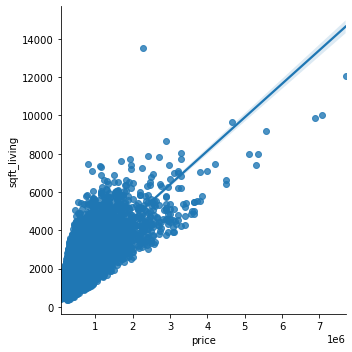

In [40]:
sns.lmplot(x="price", y="sqft_living", data=df)

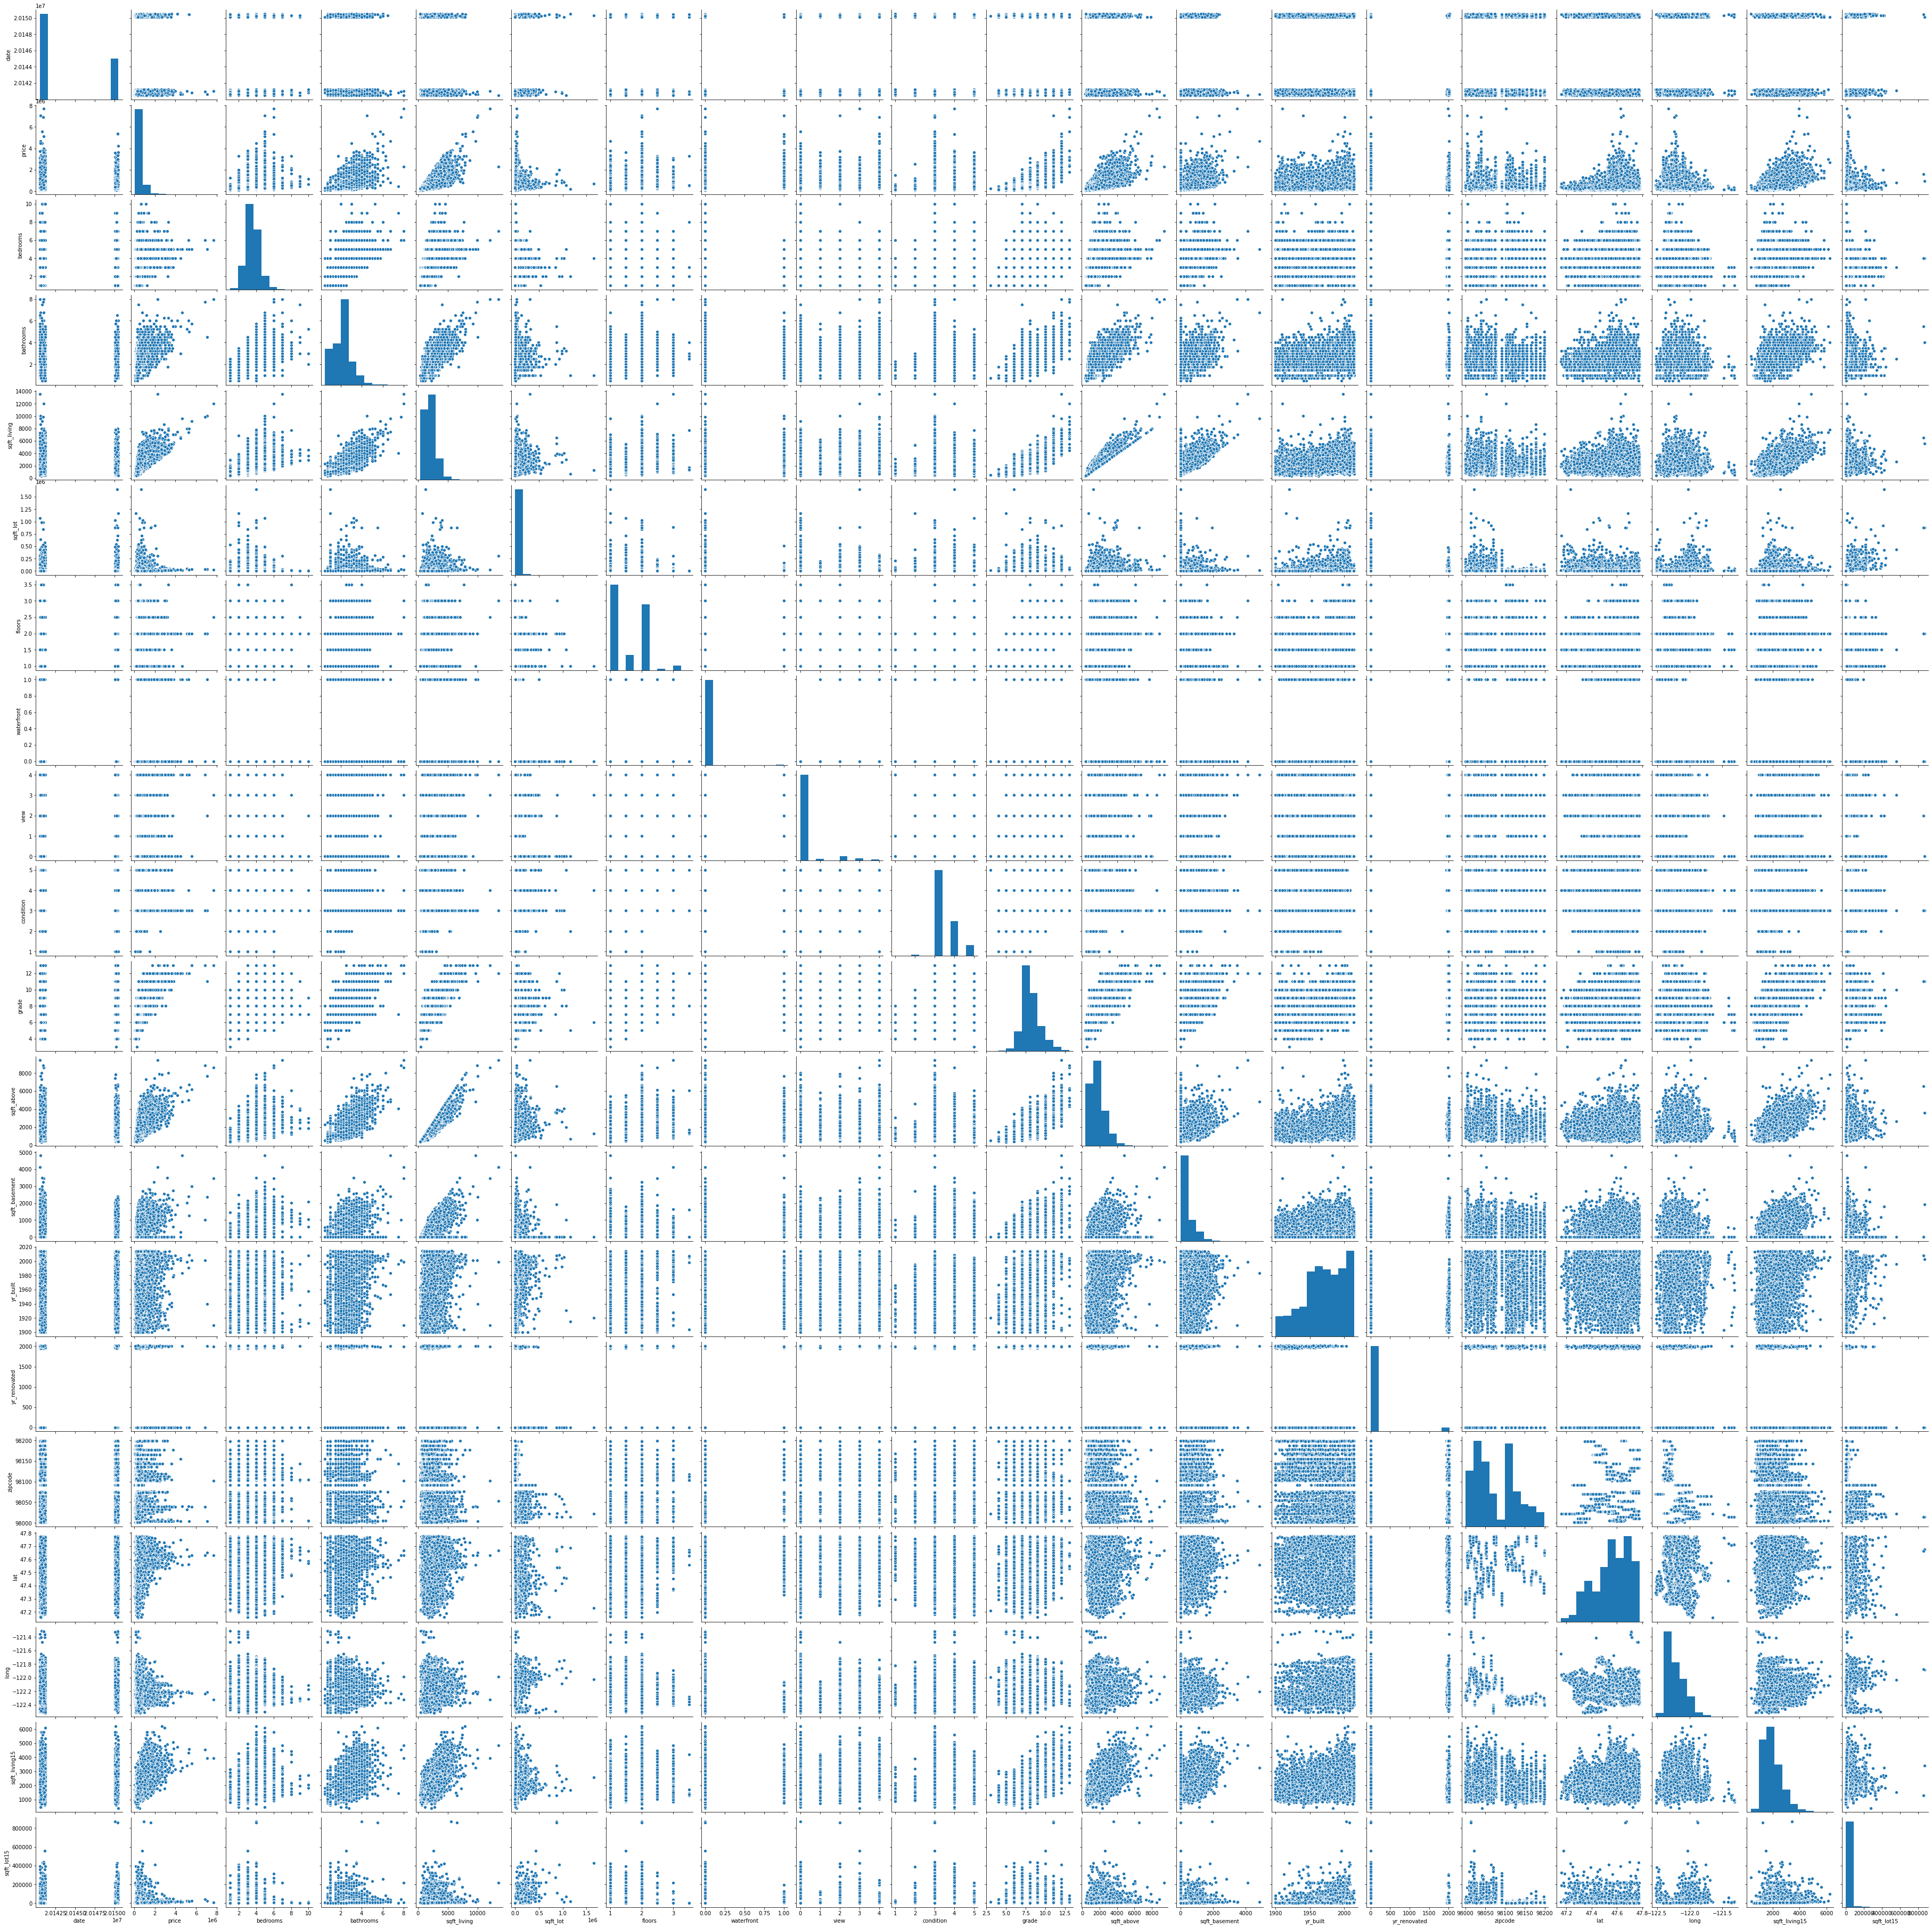

In [101]:
# start with a pairplot
sns.pairplot(df)

## Getting some basic statistics

In [42]:
df.describe().round(2)

price  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count    21597.00  21597.00   21597.00     21597.00    21597.00  21597.00   
mean    540296.57      3.37       2.12      2080.32    15099.41      1.49   
std     367368.14      0.93       0.77       918.11    41412.64      0.54   
min      78000.00      1.00       0.50       370.00      520.00      1.00   
25%     322000.00      3.00       1.75      1430.00     5040.00      1.00   
50%     450000.00      3.00       2.25      1910.00     7618.00      1.50   
75%     645000.00      4.00       2.50      2550.00    10685.00      2.00   
max    7700000.00     33.00       8.00     13540.00  1651359.00      3.50   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count    19221.00  21534.00   21597.00  21597.00    21597.00       21143.00   
mean         0.01      0.23       3.41      7.66     1788.60         291.85   
std          0.09      0.77       0.65      1.17      827.76         442.50   
min          0.00      0.00       1.00      3.00      370.00           0.00   
25%          0.00      0.00       3.00      7.00     1190.00           0.00   
50%          0.00      0.00       3.00      7.00     1560.00           0.00   
75%          0.00      0.00       4.00      8.00     2210.00         560.00   
max          1.00      4.00       5.00     13.00     9410.00        4820.00   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count  21597.00      17755.00  21597.00  21597.00  21597.00       21597.00   
mean    1971.00         83.64  98077.95     47.56   -122.21        1986.62   
std       29.38        399.95     53.51      0.14      0.14         685.23   
min     1900.00          0.00  98001.00     47.16   -122.52         399.00   
25%     1951.00          0.00  98033.00     47.47   -122.33        1490.00   
50%     1975.00          0.00  98065.00     47.57   -122.23        1840.00   
75%     1997.00          0.00  98118.00     47.68   -122.12        2360.00   
max     2015.00       2015.00  98199.00     47.78   -121.32        6210.00   

       sqft_lot15  
count    21597.00  
mean     12758.28  
std      27274.44  
min        651.00  
25%       5100.00  
50%       7620.00  
75%      10083.00  
max     871200.00

<strong>Summery</strong>
1. The Datasaet has 20 columns and 21597 lines. 
2. All dates are machine readable: int64, float64 and date.
3. All columns are named, as they should.

## Correlation analysis

In [148]:
continuous_var = ['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [149]:
categorical_var=["waterfront", 
                 "view", 
                 "condition", 
                 "grade", 
                 "zipcode"]

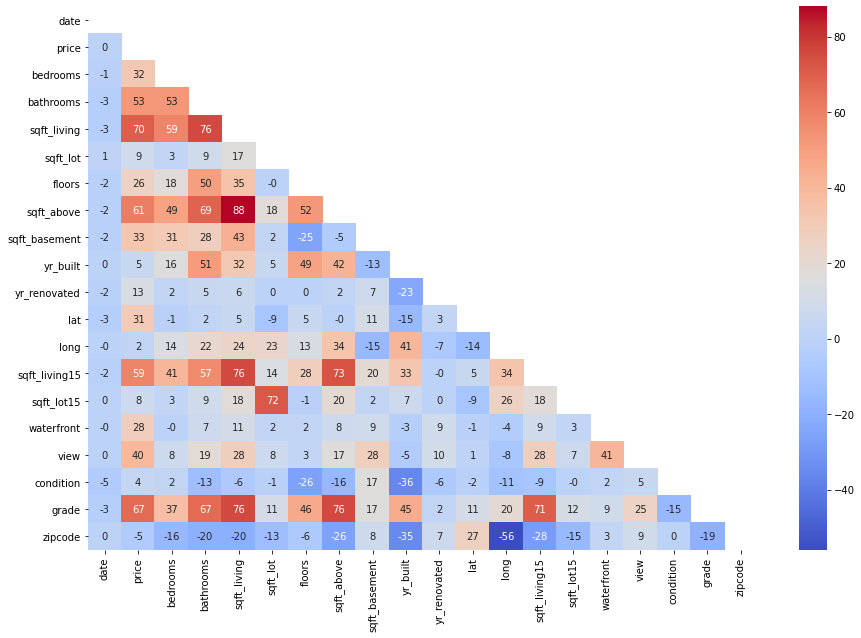

In [152]:
fig, ax = plt.subplots(figsize=(15,10))


df_dum = pd.get_dummies(df[continuous_var+categorical_var].copy())
mask = np.triu(df_dum.corr())
ax = sns.heatmap(round(df_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap="coolwarm")
                 
plt.savefig('figures/correlogram.png')

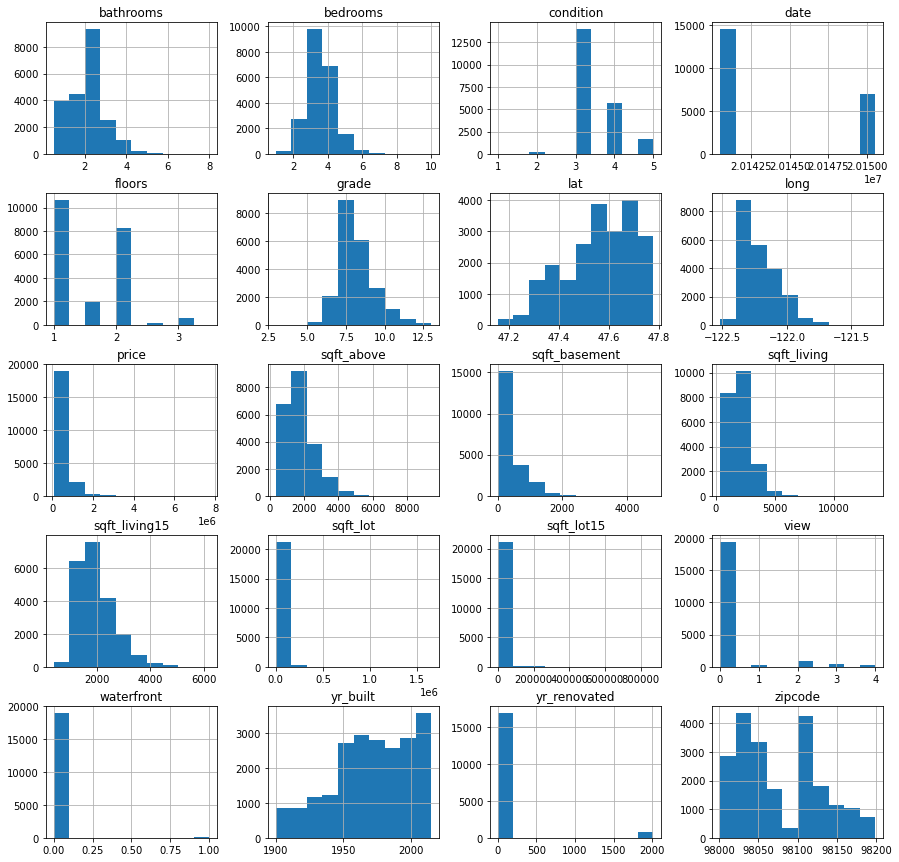

In [155]:
_ = df.hist(figsize=(15,15))
plt.savefig('figures/hist_all.png')